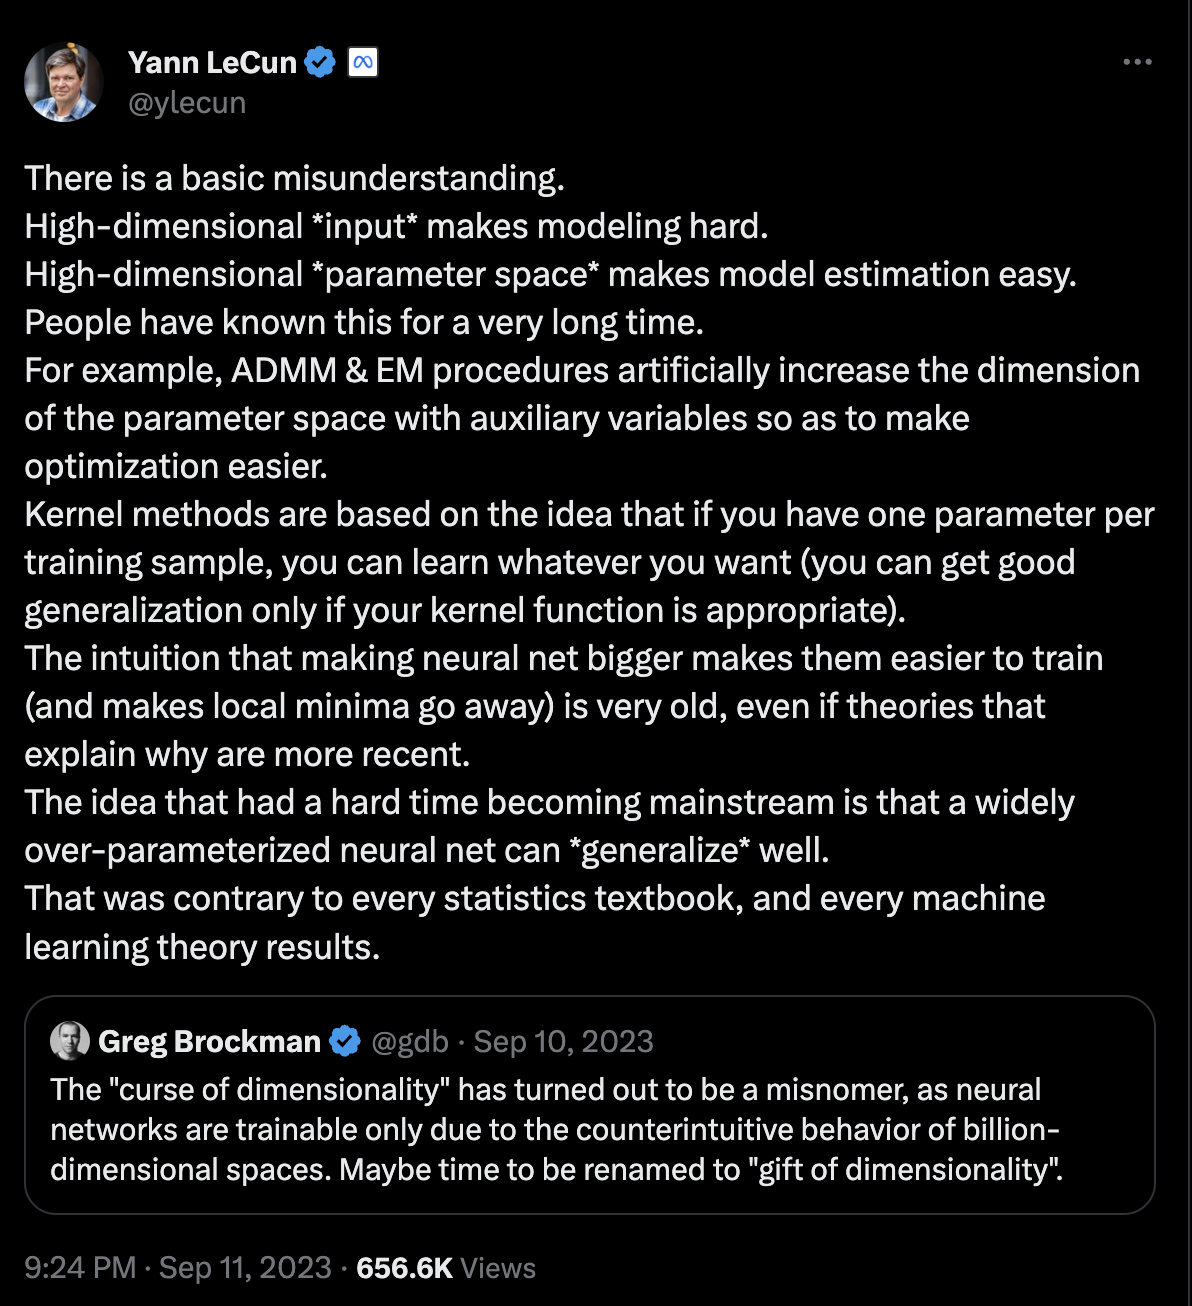## XOR perceptron

Creating a neural network to solve the XOR function is a classic problem in machine learning, showcasing how non-linear problems can be solved with neural networks.


In [ ]:
import torch
import torch.nn as nn

In [ ]:
# define "perceptron"
# a network that takes two input 'units' and produces a single output 'unit'
perceptron = nn.Linear(2, 1)
perceptron

Linear(in_features=2, out_features=1, bias=True)

In [ ]:
perceptron.weight

Parameter containing:
tensor([[-0.1581, -0.5162]], requires_grad=True)

In [ ]:
perceptron.bias

Parameter containing:
tensor([0.3194], requires_grad=True)

In [ ]:
?nn.Linear

In [ ]:
list(perceptron.parameters())

[Parameter containing:
 tensor([[-0.1581, -0.5162]], requires_grad=True),
 Parameter containing:
 tensor([0.3194], requires_grad=True)]

In [ ]:
perceptron = list(perceptron.parameters())  # returns weights and biases
perceptron

[Parameter containing:
 tensor([[-0.1581, -0.5162]], requires_grad=True),
 Parameter containing:
 tensor([0.3194], requires_grad=True)]

In [ ]:
perceptron[0][0][0]

tensor(-0.1581, grad_fn=<SelectBackward0>)

In [ ]:
# We have as many weights as we have input units
perceptron = nn.Linear(4, 1)
perceptron = list(perceptron.parameters())
perceptron[0][0].data.numpy()
#print('Perceptron Weights : ', perceptron[0][0].data.numpy())

array([0.06228417, 0.28491086, 0.49913305, 0.2238614 ], dtype=float32)

In [ ]:
# Q: How many bias terms would we have if we double the size of the input units?
print('Perceptron Bias :', perceptron[1][0].data.numpy())

Perceptron Bias : 0.33656698


In [ ]:
type(perceptron)

list

In [ ]:
len(perceptron)

2

In [ ]:
perceptron[0].shape

torch.Size([1, 4])

In [ ]:
perceptron[1]

Parameter containing:
tensor([0.3366], requires_grad=True)

In [ ]:
perceptron[0][0].shape

torch.Size([4])

## Input data

In [ ]:
import torch
import torch.nn as nn

# create data
# start creating the table for XOR, broken down in Xs and y
Xs = torch.Tensor([[0., 0.],
                   [0., 1.],
                   [1., 0.],
                   [1., 1.]])

y = torch.Tensor([0., 1., 1., 0.]).reshape(Xs.shape[0], 1)
# Q: do you remember the tables for y = AND, y = OR?
#   how would you represent them?

In [ ]:
Xs.shape

torch.Size([4, 2])

In [ ]:
torch.Tensor([0., 1., 1., 0.]).shape

torch.Size([4])

In [ ]:
torch.Tensor([0., 1., 1., 0.]).reshape(Xs.shape[0], 1).shape

torch.Size([4, 1])

In [ ]:
torch.Tensor([0., 1., 1., 0.]).reshape(Xs.shape[0], 1)

tensor([[0.],
        [1.],
        [1.],
        [0.]])

In [ ]:
torch.Tensor([0., 1., 1., 0.]).shape

torch.Size([4])

In [ ]:
y.shape

torch.Size([4, 1])

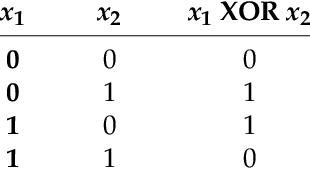

In [ ]:
# Check out this distinction, sometimes we do need singleton dimensions
# this is a mild-annoyance from PyTorch's syntax
torch.Tensor([0., 1., 1., 0.]).shape, y.shape

(torch.Size([4]), torch.Size([4, 1]))

In [ ]:
Xs

tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])

In [ ]:
y

tensor([[0.],
        [1.],
        [1.],
        [0.]])

In [ ]:
?nn.Sigmoid()

Object `nn.Sigmoid()` not found.


In [ ]:
??nn.ReLU()

Object `nn.ReLU()` not found.


## Create Multilayer Perceptron to Compute XOR, AND, OR

In [ ]:
# LOGIC is a subclass of nn.Module
# Q: What are classes / subclasses?

class LOGIC(nn.Module):
    def __init__(self):
        # here we define the network architecture
        super(LOGIC, self).__init__()

        self.linear2 = nn.Linear(2, 1)
        self.activation_function_2 = nn.Sigmoid()
        #nn.Linear is a fully connected layer
        self.linear = nn.Linear(2, 2)
        # nn.Sigmoid is a sigmoid activation
        # Q: which activations functions can we use?
        self.activation_function = nn.Sigmoid()

    # here we define the forward pass
    def forward(self, input):
        x = self.linear(input)
        #import pdb; pdb.set_trace()
        x = self.activation_function(x)
        # Q: what happens if we skip the sigmoid (or ReLU)?
        x = self.linear2(x)
        yh = self.activation_function_2(x)
        # Q: what happens if we return activation instead of yh?
        return yh

In [ ]:
?nn.NLLLoss

In [ ]:
logic_network_OR = LOGIC()
logic_network_AND = LOGIC()
logic_network_XOR = LOGIC()
# Q: what is an epoch?
epochs = 1000
mseloss = nn.MSELoss()
#celoss = nn.CrossEntropyLoss()
# The optimizer witll perform gradient descent using the network's weights
# and a given learning rate
optimizer = torch.optim.SGD(logic_network_XOR.parameters(), lr = 0.03)
all_losses = []
current_loss = 0
print_every = 50

for epoch in range(epochs):

    # input training example and return the prediction
    yhat = logic_network_XOR.forward(Xs)

    # calculate Mean Squared Error loss of our prediction
    #loss = mseloss(yhat, y)
    loss = mseloss(yhat, y)

    # backpropagate to obtain all gradients in the weight layers
    loss.backward()

    # update model weights
    optimizer.step()

    #import pdb; pdb.set_trace()

    # remove current gradients for next iteration
    optimizer.zero_grad()

    # append to loss
    current_loss += loss

    if epoch % print_every == 0:
        all_losses.append(current_loss / print_every)
        current_loss = 0

    # print progress
    if epoch % 500 == 0:
        print(f'Epoch: {epoch} completed')




Epoch: 0 completed
Epoch: 500 completed


In [ ]:
all_losses

[tensor(0.0055, grad_fn=<DivBackward0>),
 tensor(0.2710, grad_fn=<DivBackward0>),
 tensor(0.2623, grad_fn=<DivBackward0>),
 tensor(0.2571, grad_fn=<DivBackward0>),
 tensor(0.2541, grad_fn=<DivBackward0>),
 tensor(0.2525, grad_fn=<DivBackward0>),
 tensor(0.2516, grad_fn=<DivBackward0>),
 tensor(0.2511, grad_fn=<DivBackward0>),
 tensor(0.2508, grad_fn=<DivBackward0>),
 tensor(0.2507, grad_fn=<DivBackward0>),
 tensor(0.2506, grad_fn=<DivBackward0>),
 tensor(0.2505, grad_fn=<DivBackward0>),
 tensor(0.2505, grad_fn=<DivBackward0>),
 tensor(0.2505, grad_fn=<DivBackward0>),
 tensor(0.2505, grad_fn=<DivBackward0>),
 tensor(0.2505, grad_fn=<DivBackward0>),
 tensor(0.2505, grad_fn=<DivBackward0>),
 tensor(0.2505, grad_fn=<DivBackward0>),
 tensor(0.2505, grad_fn=<DivBackward0>),
 tensor(0.2505, grad_fn=<DivBackward0>)]

In [ ]:
# test input
input = torch.tensor([0., 0.])
out = logic_network_XOR(input)
out.round()

tensor([0.], grad_fn=<RoundBackward0>)

In [ ]:
input = torch.tensor([1., 1.])
out = logic_network_XOR(input)
out

tensor([0.5039], grad_fn=<SigmoidBackward0>)

In [ ]:
input = torch.tensor([0., 1.])
out = logic_network_XOR(input)
out

tensor([0.4856], grad_fn=<SigmoidBackward0>)

In [ ]:
input = torch.tensor([1., 0.])
out = logic_network_XOR(input)
out

tensor([0.5130], grad_fn=<SigmoidBackward0>)

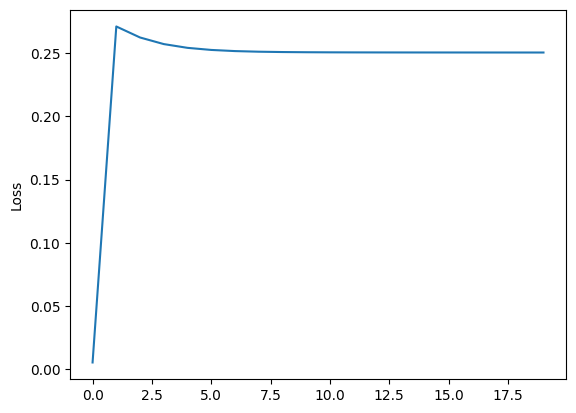

In [ ]:
import matplotlib.pyplot as plt

with torch.no_grad():
  plt.plot(all_losses)
  plt.ylabel('Loss')
  plt.show()

## Theoretical vs practical results

Even though in theory a network with a single hidden layer should be able to find the correct output of the XOR function, there is a very limited number of weights that would allow us to find this.

Tweaking parameters such as the number of hidden layers, epochs, and learning rate should allow us to find the solution to the XOR function with lower difficulty even though it's not theoretically needed.

Try evaluating the networks below.

In [ ]:
# Redefine the XOR class with a more complex structure
class XORNetV2(nn.Module):
    def __init__(self):
        super(XORNetV2, self).__init__()
        # Two input neurons, a larger hidden layer, and one output neuron
        self.layer1 = nn.Linear(2, 4)
        self.layer2 = nn.Linear(4, 1)

    def forward(self, x):
        x = torch.sigmoid(self.layer1(x))
        x = torch.sigmoid(self.layer2(x))
        return x

# Reinitialize the model, loss function, and optimizer
model_v2 = XORNetV2()
criterion_v2 = nn.MSELoss()
optimizer_v2 = torch.optim.Adam(model_v2.parameters(), lr=0.1)

# Training loop
for epoch in range(3000):  # Increased number of epochs
    # Forward pass
    Y_pred = model_v2(Xs)

    # Compute loss
    loss = criterion_v2(Y_pred, y)

    # Backward pass and optimize
    optimizer_v2.zero_grad()
    loss.backward()
    optimizer_v2.step()

    if epoch % 300 == 0:
        print(f'Epoch [{epoch}/3000], Loss: {loss.item():.4f}')

# Test the model
with torch.no_grad():
    Y_pred = model_v2(Xs)
    predicted = Y_pred.round()

print(f"\nInput: {Xs}\n")
print(f'\nTrained Neural Network output: \n{Y_pred.round()}')


Epoch [0/3000], Loss: 0.2804
Epoch [300/3000], Loss: 0.0003
Epoch [600/3000], Loss: 0.0001
Epoch [900/3000], Loss: 0.0000
Epoch [1200/3000], Loss: 0.0000
Epoch [1500/3000], Loss: 0.0000
Epoch [1800/3000], Loss: 0.0000
Epoch [2100/3000], Loss: 0.0000
Epoch [2400/3000], Loss: 0.0000
Epoch [2700/3000], Loss: 0.0000

Input: tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])


Trained Neural Network output: 
tensor([[0.],
        [1.],
        [1.],
        [0.]])


## Adjustments for Cross-Entropy Loss

In [ ]:
# Redefine the XOR class for Cross Entropy Loss
class XORNetCE(nn.Module):
    def __init__(self):
        super(XORNetCE, self).__init__()
        # Two input neurons, a hidden layer, and one output neuron
        self.layer1 = nn.Linear(2, 4)
        self.layer2 = nn.Linear(4, 1)

    def forward(self, x):
        x = torch.sigmoid(self.layer1(x))
        x = torch.sigmoid(self.layer2(x))
        return x

# Reinitialize the model and use BCELoss
model_ce = XORNetCE()
criterion_ce = nn.BCELoss()
optimizer_ce = torch.optim.Adam(model_ce.parameters(), lr=0.1)

# Training loop
for epoch in range(3000):
    # Forward pass
    Y_pred = model_ce(Xs)

    # Compute loss
    loss = criterion_ce(Y_pred, y)

    # Backward pass and optimize
    optimizer_ce.zero_grad()
    loss.backward()
    optimizer_ce.step()

    if epoch % 300 == 0:
        print(f'Epoch [{epoch}/3000], Loss: {loss.item():.4f}')

# Test the model
with torch.no_grad():
    Y_pred = model_ce(Xs)
    predicted = Y_pred.round()
    accuracy_ce = (predicted.eq(y).sum() / float(y.size(0)))

print(f"\nInput: {Xs}\n")
print(f'\nTrained Neural Network output: \n{Y_pred.round()}')
print(f'Accuracy: {accuracy_ce.item():.4f}')


Epoch [0/3000], Loss: 0.6942
Epoch [300/3000], Loss: 0.0030
Epoch [600/3000], Loss: 0.0010
Epoch [900/3000], Loss: 0.0005
Epoch [1200/3000], Loss: 0.0003
Epoch [1500/3000], Loss: 0.0002
Epoch [1800/3000], Loss: 0.0002
Epoch [2100/3000], Loss: 0.0001
Epoch [2400/3000], Loss: 0.0001
Epoch [2700/3000], Loss: 0.0001

Input: tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])


Trained Neural Network output: 
tensor([[0.],
        [1.],
        [1.],
        [0.]])
Accuracy: 1.0000


## Visualizing decision boundaries

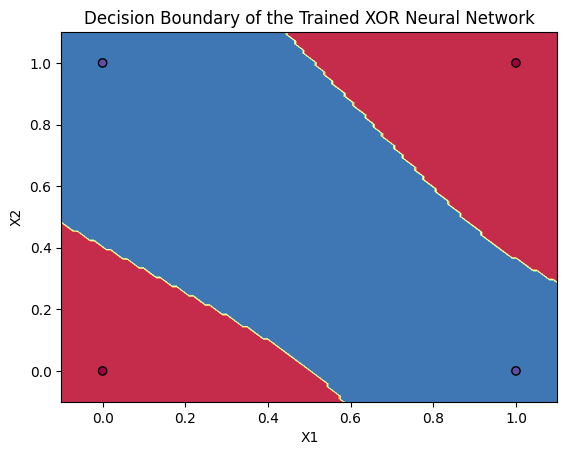

In [ ]:
import numpy as np
def plot_decision_boundary(model, X, Y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    spacing = 0.01

    # Generate a grid of points with distance spacing between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, spacing), np.arange(y_min, y_max, spacing))

    # Predict the function value for the whole grid
    with torch.no_grad():
        Z = model(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32))
        Z = Z.round().reshape(xx.shape)

    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=Y.squeeze(), cmap=plt.cm.Spectral, edgecolors='k')
    plt.xlabel('X1')
    plt.ylabel('X2')

# Data for plotting
X = np.array([[0,0], [0,1], [1,0], [1,1]])
Y = np.array([[0], [1], [1], [0]])

# Plotting the decision boundary
plot_decision_boundary(model_ce, X, Y)
plt.title("Decision Boundary of the Trained XOR Neural Network")
plt.show()

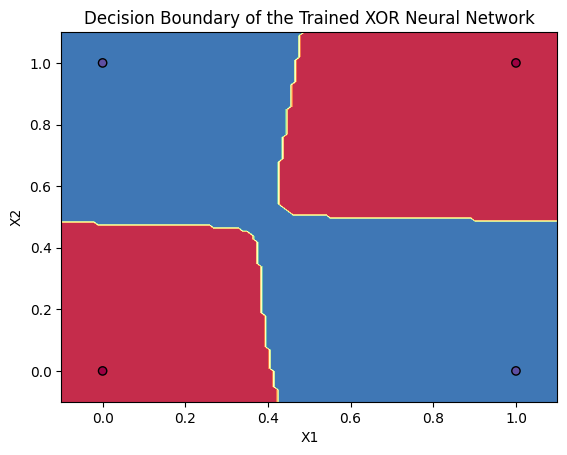

In [ ]:
# Plotting the decision boundary
plot_decision_boundary(model_v2, X, Y)
plt.title("Decision Boundary of the Trained XOR Neural Network")
plt.show()

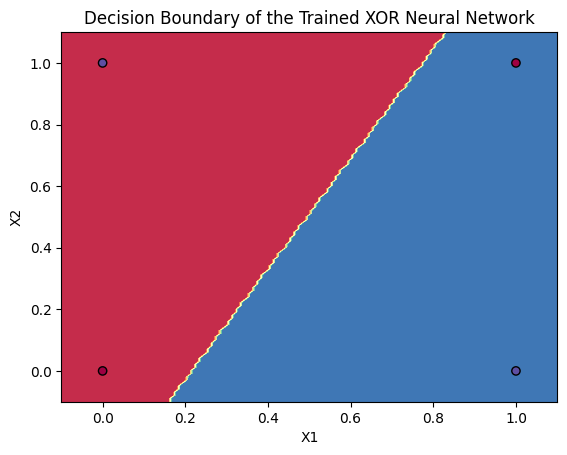

In [ ]:
# Plotting the decision boundary
plot_decision_boundary(logic_network_XOR, X, Y)
plt.title("Decision Boundary of the Trained XOR Neural Network")
plt.show()

## Further discussion

<blockquote class="twitter-tweet"><p lang="en" dir="ltr">There is a basic misunderstanding.<br>High-dimensional *input* makes modeling hard.<br>High-dimensional *parameter space* makes model estimation easy.<br>People have known this for a very long time.<br>For example, ADMM &amp; EM procedures artificially increase the dimension of the parameter… <a href="https://t.co/sB7CsnRAfH">https://t.co/sB7CsnRAfH</a></p>&mdash; Yann LeCun (@ylecun) <a href="https://twitter.com/ylecun/status/1701315853550014843?ref_src=twsrc%5Etfw">September 11, 2023</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>